In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

np.random.seed(20)

In [2]:
#create 2-D dataset
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 200
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0) #number of observations
K = 3 #number of clusters

original_label = np.asarray([0]*N + [1]*N + [2]*N).T #true labels

In [3]:
def kmeans_plot(data, labels):
    '''Plotting dataset'''

    K = max(labels) + 1
    fig, ax = plt.subplots()

    for i in range(K):
        x = data[labels == i, 0]
        y = data[labels == i, 1]

        ax.scatter(x, y, s=10, alpha=.8)
    ax.set_title(f'Dataset X with {data.shape[0]} observations and {K} clusters')

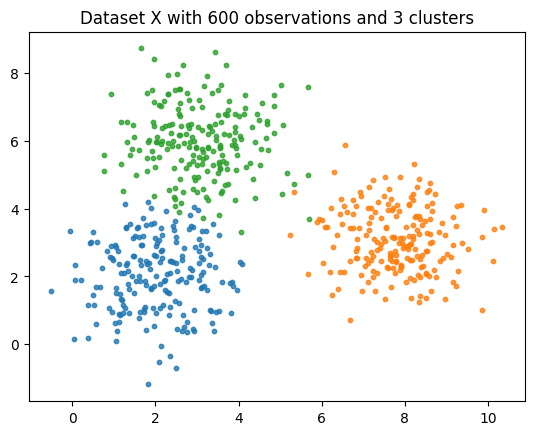

In [4]:
kmeans_plot(X, original_label)

In [5]:
def k_means(data, K, max_it_num=10):
    '''Execute the K-means algorithm'''

    def assign_label(data, centroids):
        #calculate distance of each point to all centroids
        D = cdist(data, centroids)

        #get the nearest centroid
        labels = np.argmin(D, axis=1)

        return labels

    def update_centroids(data, labels, centroid_id):
        #get all points within the cluster of centroid = centroid_id
        centroid_points = data[labels == centroid_id, :]

        #compute new centroid of that cluster
        new_centroid = np.mean(centroid_points, axis=0)

        return new_centroid

    #step 1
    centroids = data[np.random.choice(data.shape[0], K, replace=False)]

    #log labels of the dataset
    labels_hist = []
    it_count = 0

    for _ in range(max_it_num):
        #step 2
        label = assign_label(data, centroids)

        #step 3. Compare the newly calculated labels with the previous set
        if len(labels_hist) != 0 and (label == labels_hist[-1]).all():
            break
        
        #logging labels
        labels_hist.append(label)

        #step 4
        for centroid_id in range(K):
            centroids[centroid_id] = update_centroids(data, label, centroid_id)

        it_count += 1
    
    return (it_count, labels_hist[-1], centroids)

In [6]:
(n, labels, centroids) = k_means(X, 3, 30)
print(f'Total iterations: {n}')
print(f'All centroids: {centroids}')

Total iterations: 5
All centroids: [[7.79389377 3.07849771]
 [3.07710524 6.00181624]
 [2.03887496 2.04436512]]


In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=20, init='random').fit(X)
print(f'All centroids: {kmeans.cluster_centers_}')

All centroids: [[3.07710524 6.00181624]
 [2.03887496 2.04436512]
 [7.79389377 3.07849771]]


c:\Users\truon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


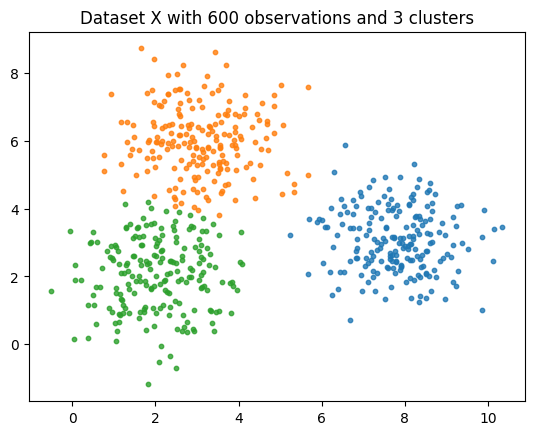

In [8]:
kmeans_plot(X, labels)

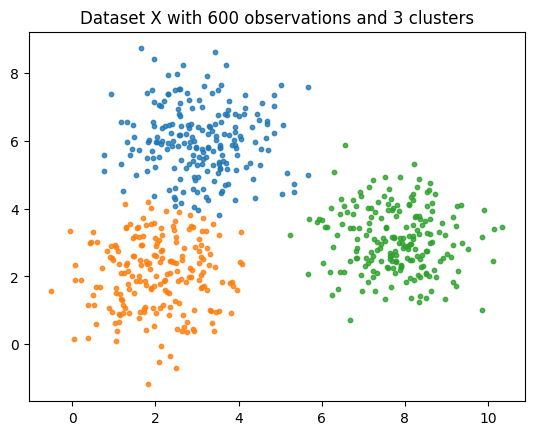

In [9]:
kmeans_plot(X, kmeans.labels_)